In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/drive/MyDrive/DAIICT-Data-Mining/smoking_driking_dataset.csv')
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


> **Our Target is to classify the person is a smoker or drinker or both.**



In [3]:
# Making the copy of orginal dataset
temp_df = df.copy()

In [4]:
# Shape of dataset
temp_df.shape

(991346, 24)

In [5]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

In [6]:
temp_df.isna().sum()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

In [7]:
temp_df.columns

Index(['sex', 'age', 'height', 'weight', 'waistline', 'sight_left',
       'sight_right', 'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS',
       'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin',
       'urine_protein', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT',
       'gamma_GTP', 'SMK_stat_type_cd', 'DRK_YN'],
      dtype='object')

In [8]:
def get_bmi(row):
    weight = row["weight"]
    height = row["height"]
    return weight / (height ** 2)

def get_blood_pressure_ratio(row):
    sbp = row["SBP"]
    dbp = row["DBP"]
    return sbp / dbp

def get_hdl_cholestorol_ratio(row):
    hdl_chole = row["HDL_chole"]
    total_chole = row["tot_chole"]
    return hdl_chole / total_chole

def get_ldl_cholestorol_ratio(row):
    ldl_chole = row["LDL_chole"]
    total_chole = row["tot_chole"]
    return ldl_chole / total_chole

In [9]:
temp_df["bmi"] = get_bmi(temp_df)
temp_df["BP_ratio"] = get_blood_pressure_ratio(temp_df)
temp_df["HDL_ratio"] = get_hdl_cholestorol_ratio(temp_df)
temp_df["LDL_ratio"] = get_ldl_cholestorol_ratio(temp_df)

In [10]:
# Function to classify individuals

def classify_drinker_smoker(row):
    drinker = row["DRK_YN"]
    smoker = row["SMK_stat_type_cd"]

    if drinker == "Y" and smoker == "Is Smoking":
        return "Both Smoker and Drinker"
    elif drinker == "Y":
        return "Drinker"
    elif smoker == "Never Smoked":
        return "Non-Smoker"
    elif smoker == "Smoked But Quit":
        return "Former Smoker"
    elif smoker == "Is Smoking":
        return "Smoker"
    else:
        return "None"

def classify_eyesight(val):
    if val > 1:
        return "Good"
    elif val > 0.5:
        return "Average"
    elif val > 0.25:
        return "Poor"
    else:
        return "Very Poor"

def classify_blood_pressure(row):
    sbp = row["SBP"]
    dbp = row["DBP"]
    if sbp < 120 and dbp < 80:
        return "Normal"
    elif sbp < 130 and dbp < 80:
        return "Elevated"
    elif sbp < 140 and dbp < 90:
        return "HS1" # Hypertension Stage 1
    elif sbp < 180 and dbp < 120:
        return "HS2" # Hypertension Stage 2
    else:
        return "HC" # Hypertensive Crisis

def classify_blood_glucose(row):
    blood_glucose = row["BLDS"]
    if blood_glucose < 100:
        return "Normal"
    elif blood_glucose < 125:
        return "Pre-Diabetes"
    else:
        return "Diabetes"

def classify_serum_creatinine(row):
    serum_creatinine = row["serum_creatinine"]
    if serum_creatinine < 2.7:
        return "Normal"
    else:
        return "Abnormal"

def classify_SGOT_AST(row):
    sgot_ast = row["SGOT_AST"]
    if sgot_ast < 40:
        return "Normal"
    else:
        return "Abnormal"

def classify_SGOT_ALT(row):
    sgot_alt = row["SGOT_ALT"]
    if sgot_alt < 40:
        return "Normal"
    else:
        return "Abnormal"

def classify_gamma_GTP(row):
    gamma_gtp = row["gamma_GTP"]
    sex = row["sex"]
    if sex == "Male":
        if gamma_gtp >= 11 and gamma_gtp <= 63:
            return "Normal"
        else:
            return "Abnormal"
    else:
        if gamma_gtp >= 8 and gamma_gtp <= 35:
            return "Normal"
        else:
            return "Abnormal"


In [11]:
temp_df["sight_left_class"] = temp_df["sight_left"].apply(classify_eyesight)
temp_df["sight_right_class"] = temp_df["sight_right"].apply(classify_eyesight)
temp_df["blood_pressure_class"] = temp_df.apply(classify_blood_pressure, axis=1)
temp_df["blood_glucose_class"] = temp_df.apply(classify_blood_glucose, axis=1)
temp_df["serum_creatinine_class"] = temp_df.apply(classify_serum_creatinine, axis=1)
temp_df["SGOT_AST_class"] = temp_df.apply(classify_SGOT_AST, axis=1)
temp_df["SGOT_ALT_class"] = temp_df.apply(classify_SGOT_ALT, axis=1)
temp_df["gamma_GTP_class"] = temp_df.apply(classify_gamma_GTP, axis=1)

In [12]:
smoking_values_dict = {
    1: 'Never Smoked',
    2: 'Smoked But Quit',
    3: 'Is Smoking'
}

for k, v in smoking_values_dict.items():
    temp_df.loc[temp_df["SMK_stat_type_cd"] == k, "SMK_stat_type_cd"] = v

In [13]:
temp_df["SMK_DRK"] = temp_df.apply(classify_drinker_smoker, axis=1)

In [14]:
temp_df.describe(include='O').T

,count,unique,top,freq
sex,991346,2,Male,526415
SMK_stat_type_cd,991346,3,Never Smoked,602441
DRK_YN,991346,2,N,495858
sight_left_class,991346,4,Average,544021
sight_right_class,991346,4,Average,546862
blood_pressure_class,991346,5,Normal,390076
blood_glucose_class,991346,3,Normal,620133
serum_creatinine_class,991346,2,Normal,990193
SGOT_AST_class,991346,2,Normal,912151
SGOT_ALT_class,991346,2,Normal,860523


In [15]:
categorical_features = ['SMK_DRK', 'SMK_stat_type_cd', 'DRK_YN', 'sight_left_class', 'sight_right_class', 'blood_pressure_class',
                        'blood_glucose_class', 'serum_creatinine_class', 'SGOT_AST_class', 'SGOT_ALT_class', 'gamma_GTP_class', 'sex']

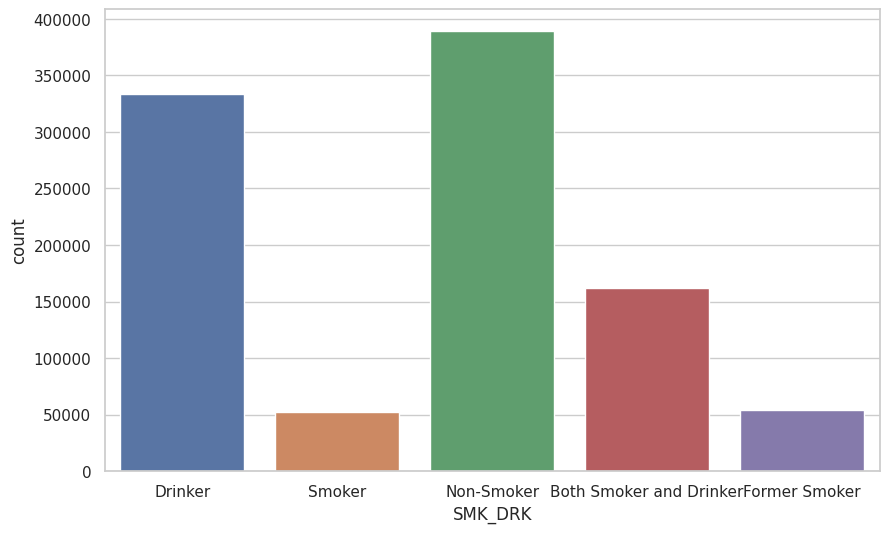

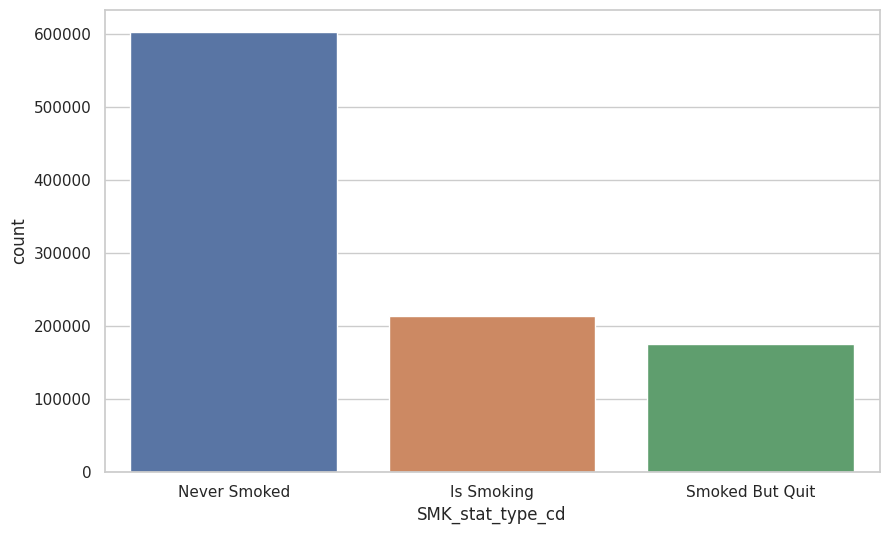

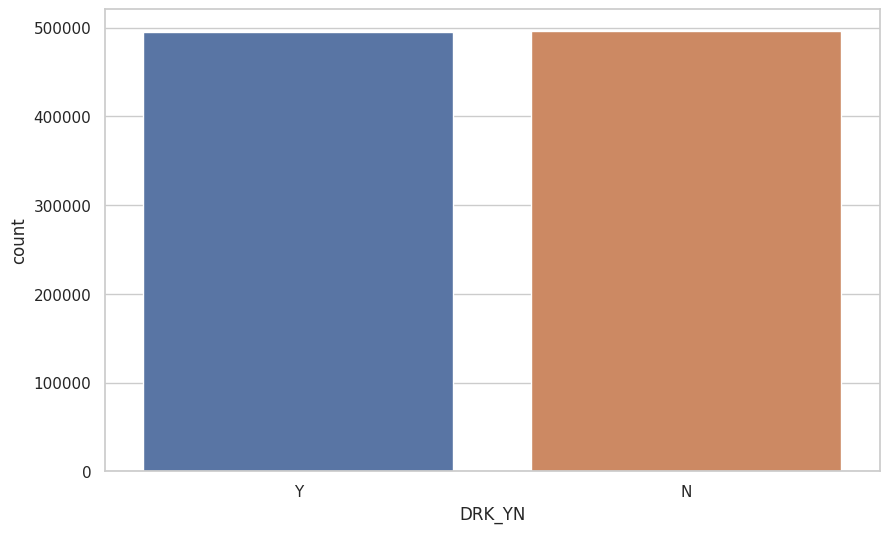

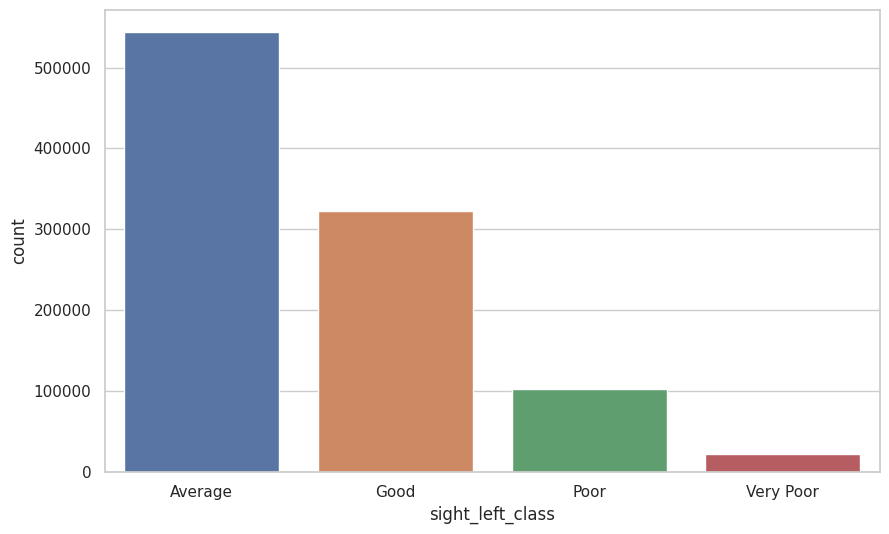

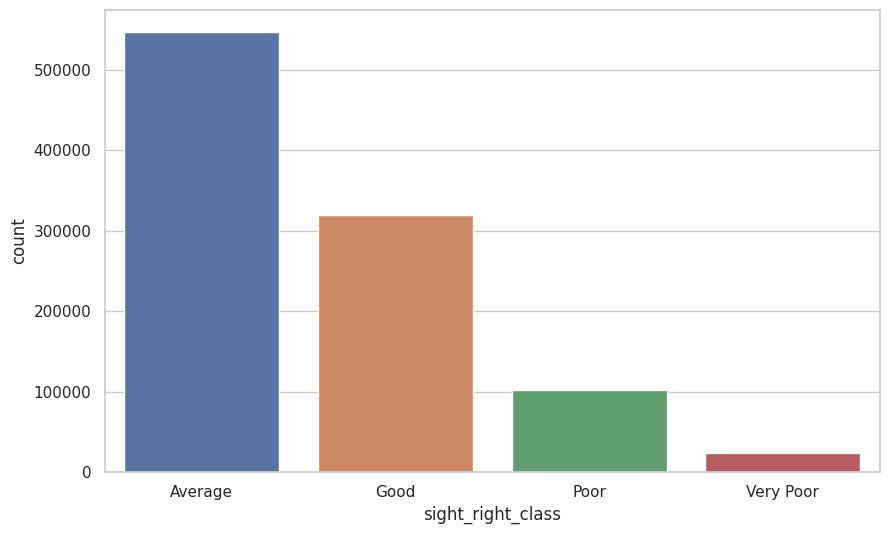

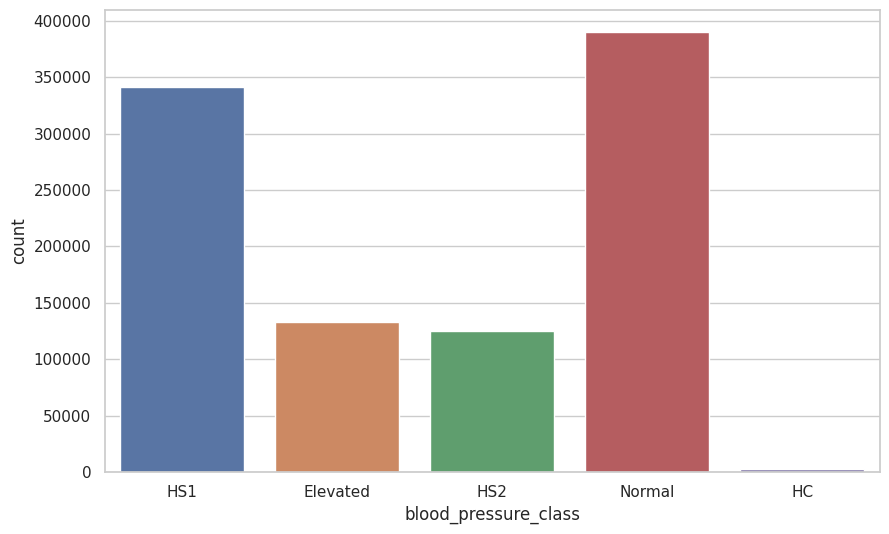

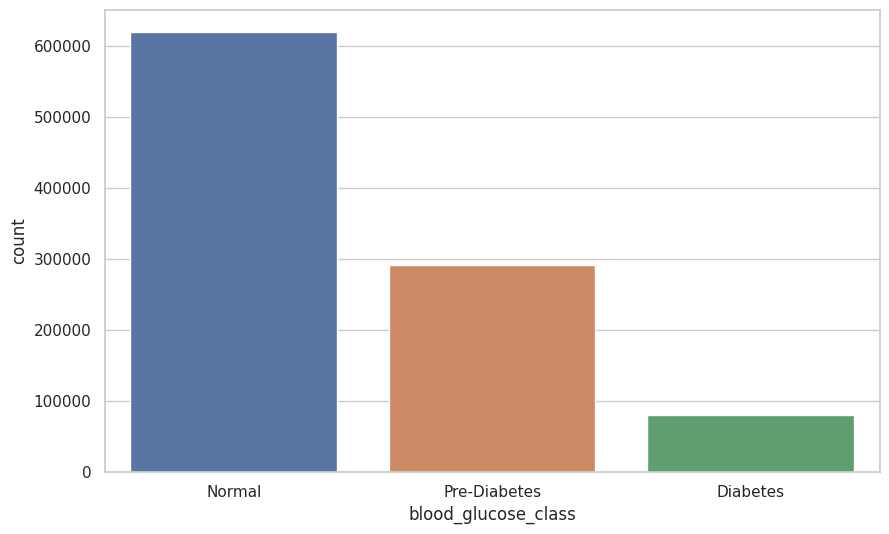

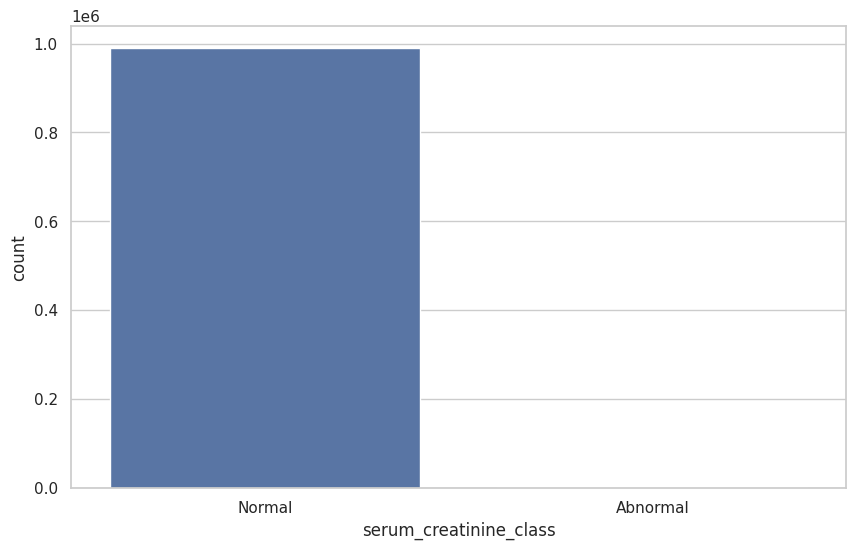

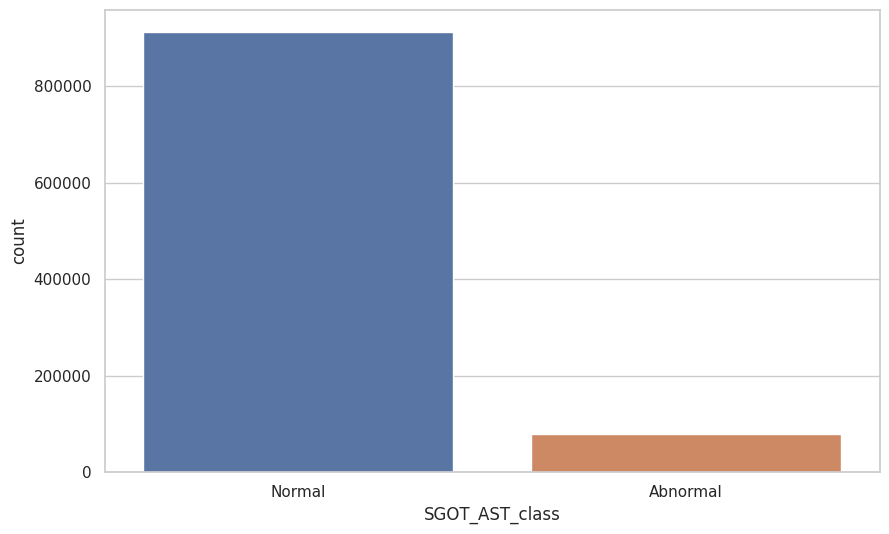

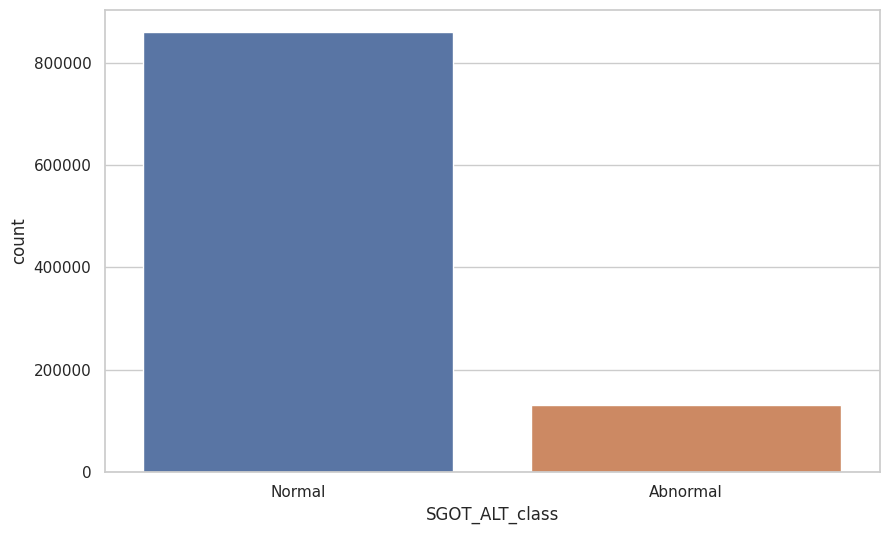

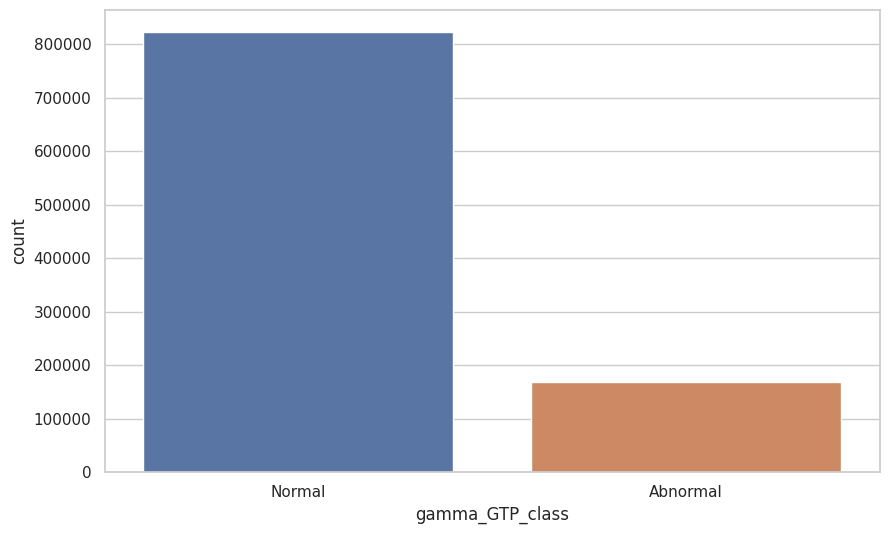

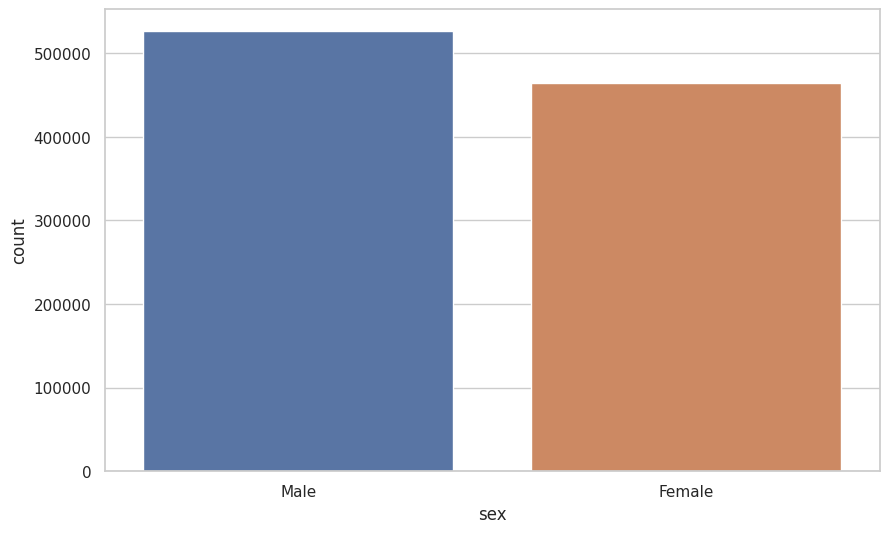

In [16]:
# count plot for categorical features

for feature in categorical_features:
  plt.figure(figsize=(10, 6))
  sns.set(style="whitegrid")
  sns.countplot(data=temp_df, x=feature)

  plt.show()

In [17]:
# Get all numerical columns
numerical_columns = temp_df.select_dtypes(include=['int64', 'float64']).columns

print(numerical_columns)

Index(['age', 'height', 'weight', 'waistline', 'sight_left', 'sight_right',
       'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS', 'tot_chole',
       'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin', 'urine_protein',
       'serum_creatinine', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP', 'bmi',
       'BP_ratio', 'HDL_ratio', 'LDL_ratio'],
      dtype='object')


In [18]:
numerical_features = ['age', 'height', 'weight', 'waistline', 'sight_left', 'sight_right',
       'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS', 'tot_chole',
       'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin', 'urine_protein',
       'serum_creatinine', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP', 'bmi',
       'BP_ratio', 'HDL_ratio', 'LDL_ratio']

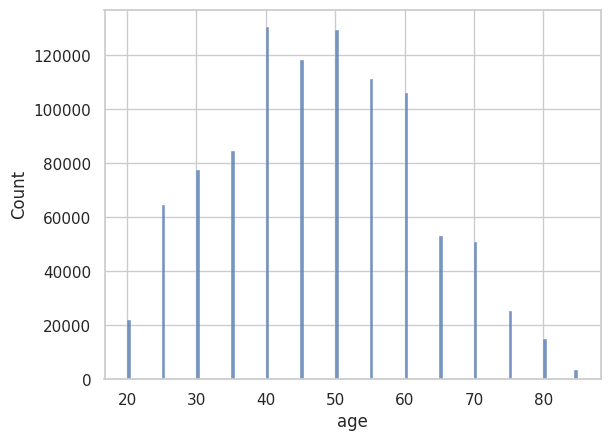

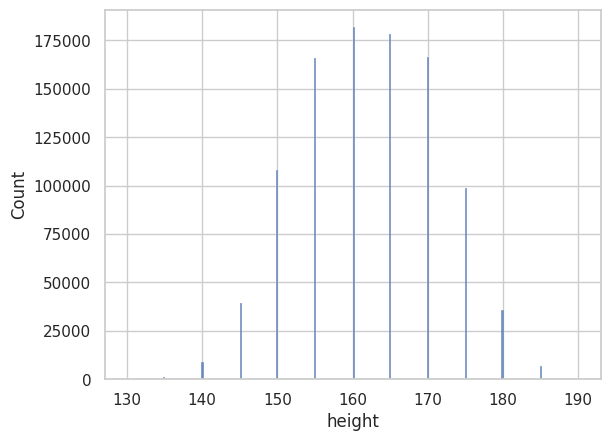

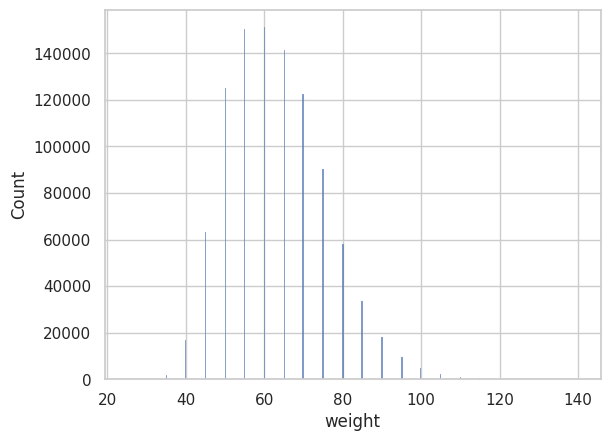

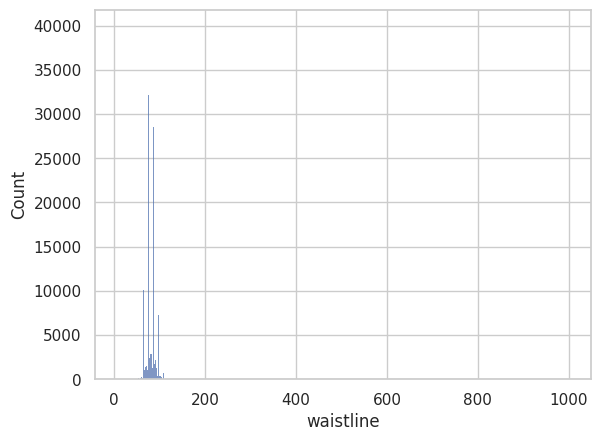

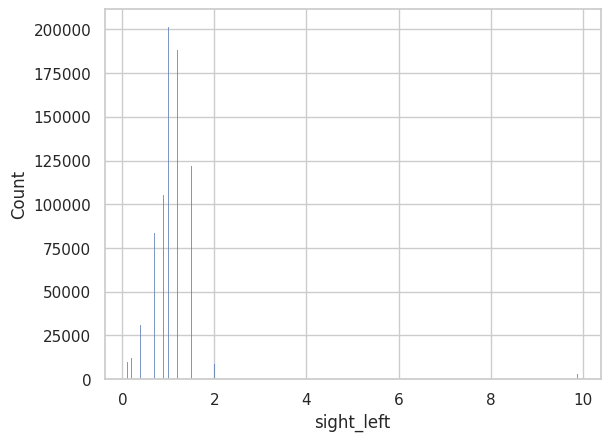

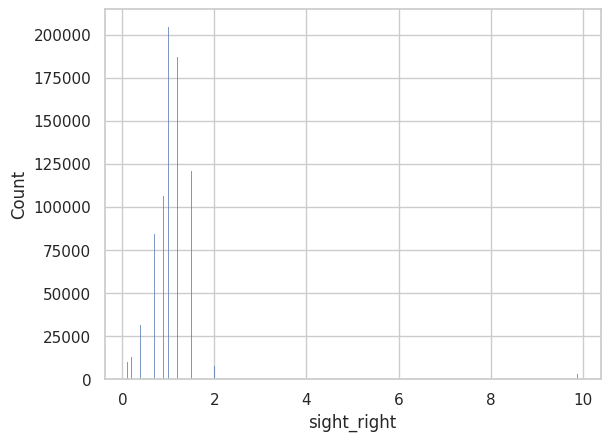

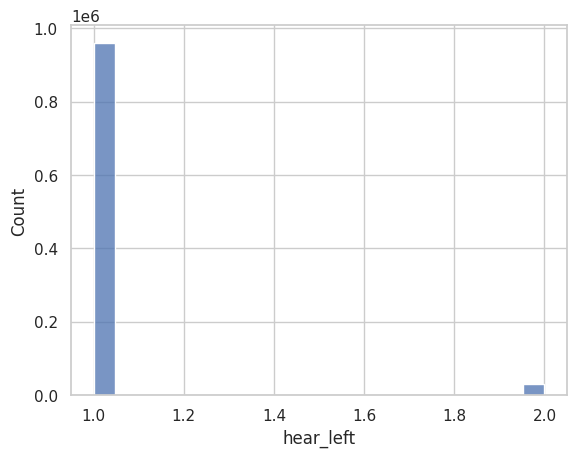

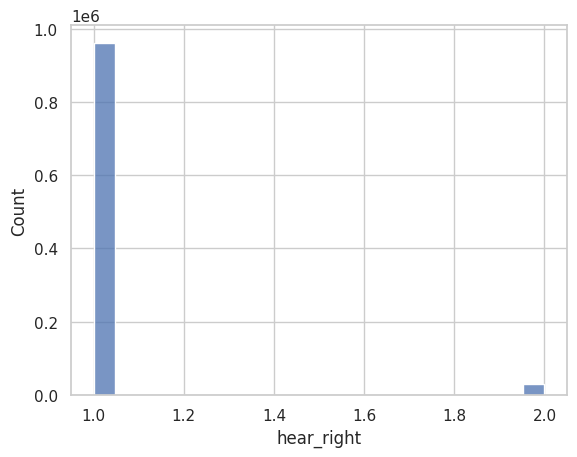

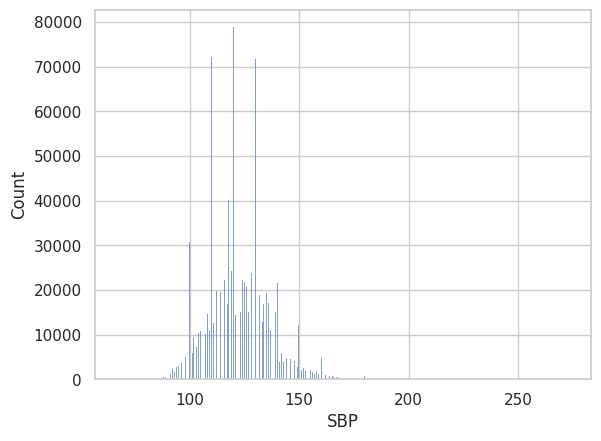

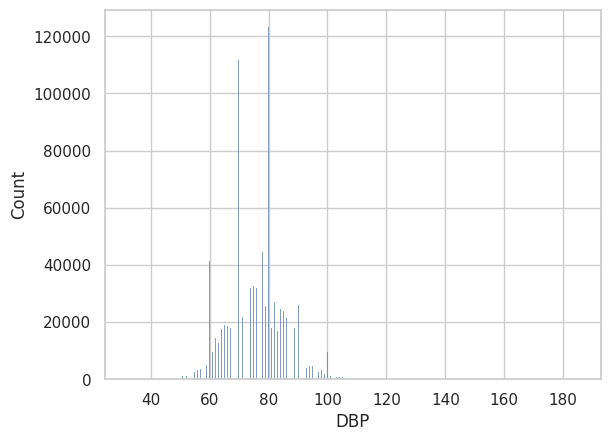

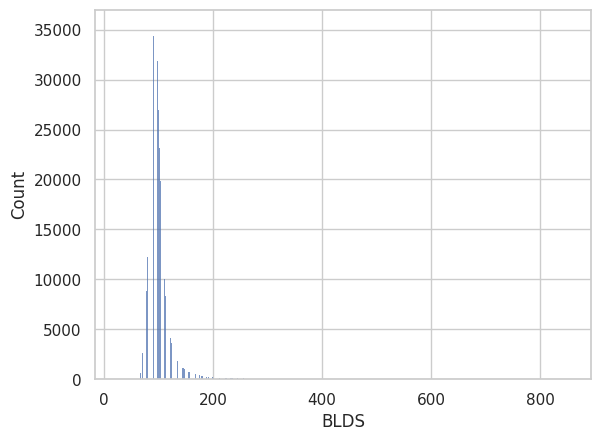

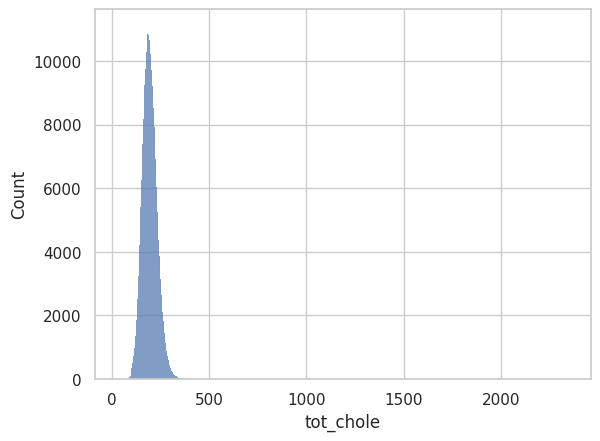

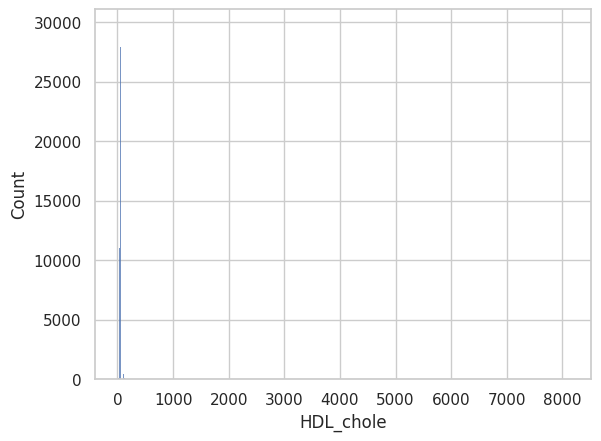

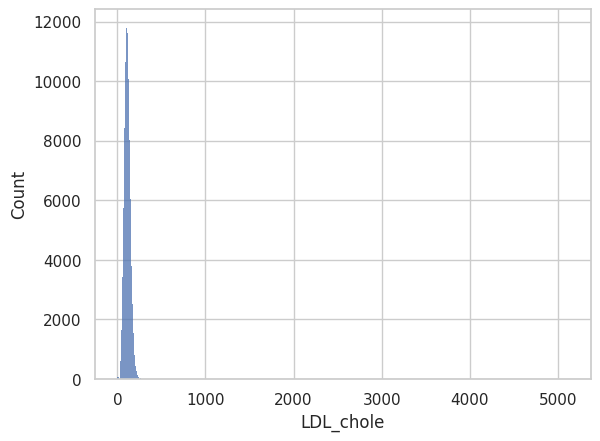

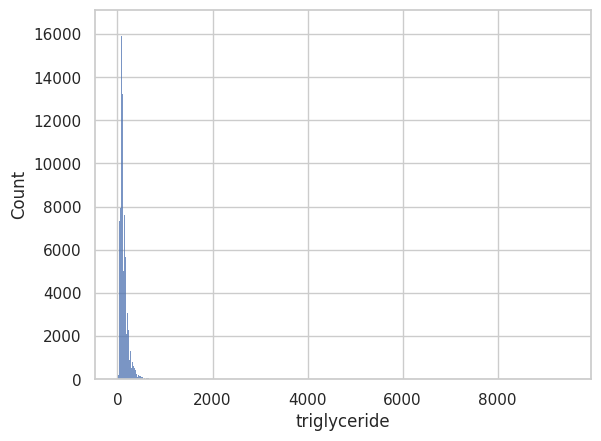

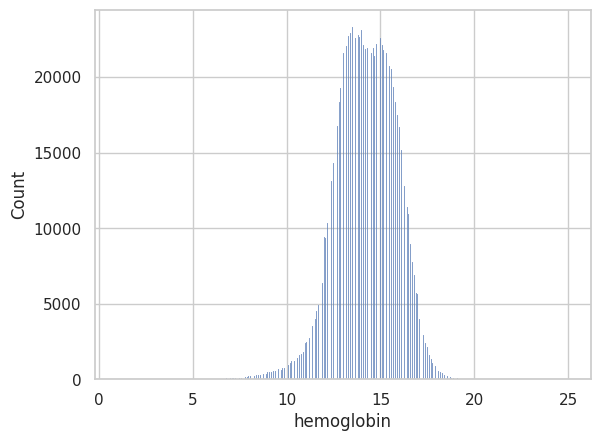

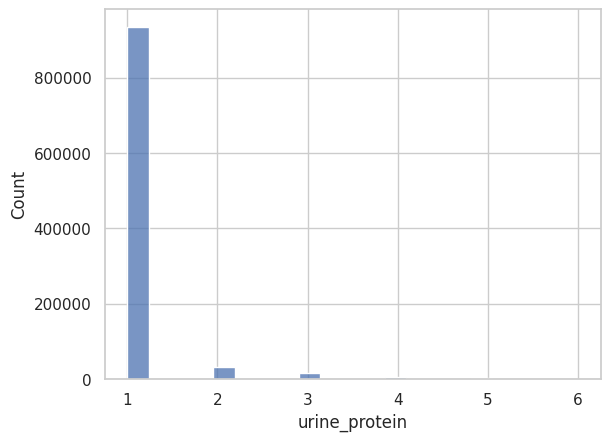

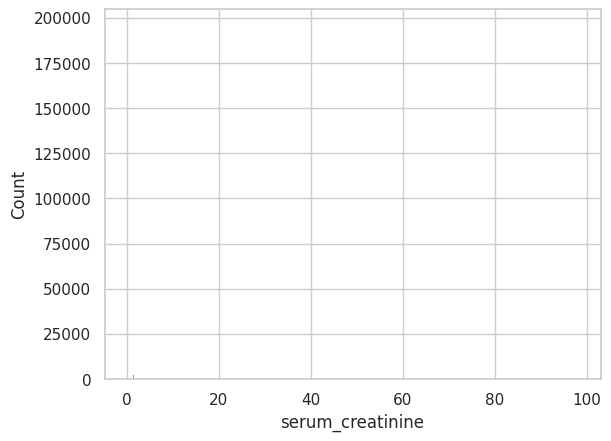

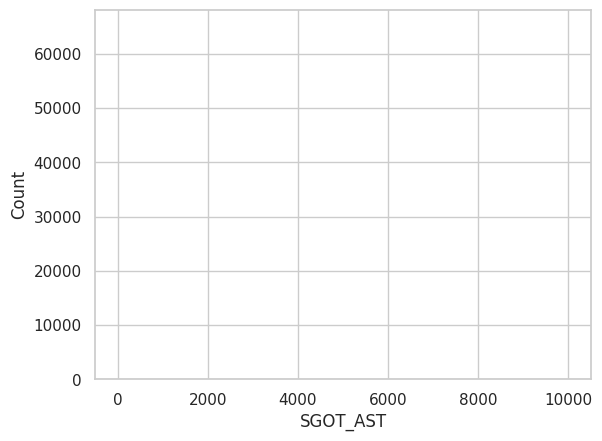

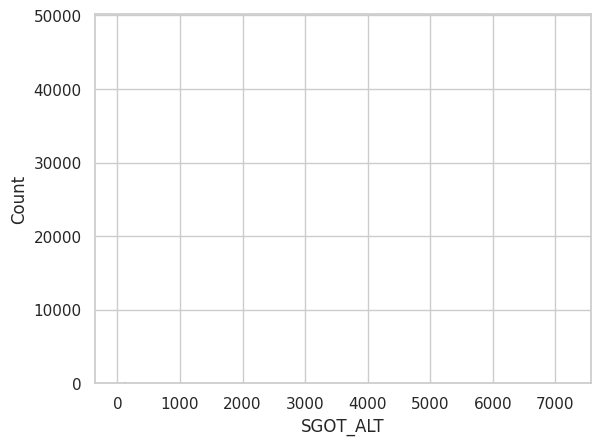

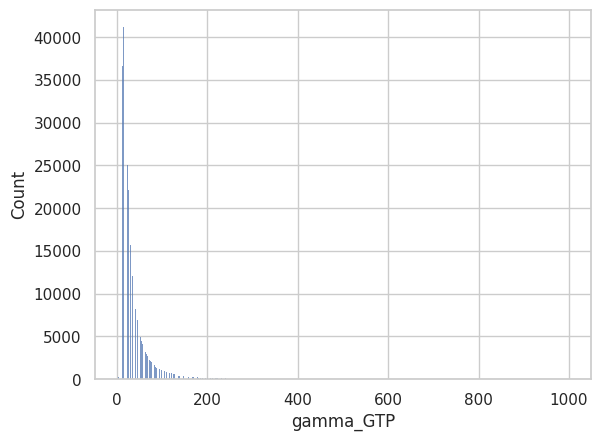

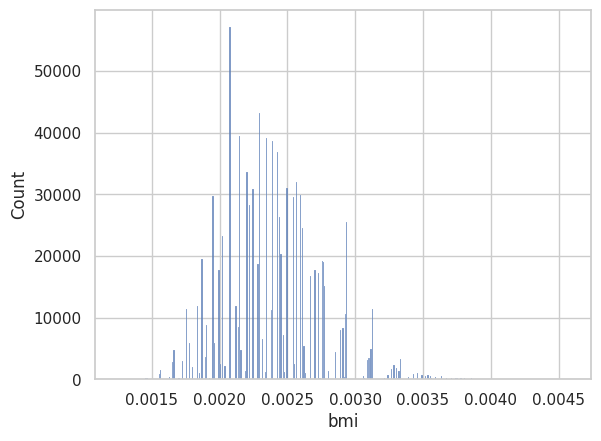

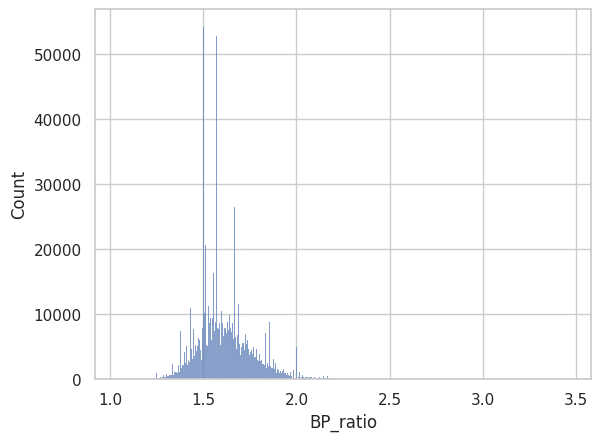

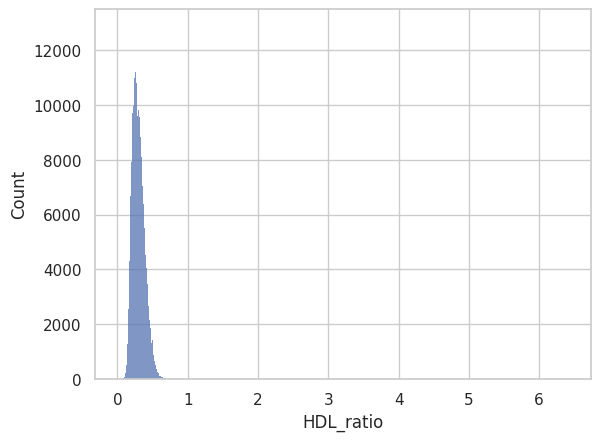

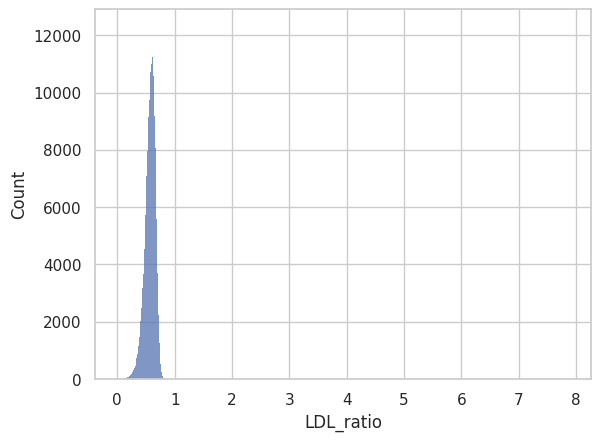

In [19]:
for feature in numerical_features:
  sns.histplot(data=temp_df, x=feature)
  plt.show()

In [20]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC

In [21]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to all the categorical features
for feature in categorical_features:
    temp_df[feature + '_encoded'] = label_encoder.fit_transform(temp_df[feature])

In [22]:
new_df = temp_df.copy()  # Create a copy of the DataFrame
print("Before dropping features: ", new_df.shape)

# Drop the specified columns and update new_df
new_df = new_df.drop(['SMK_DRK', 'SMK_stat_type_cd', 'DRK_YN', 'sight_left_class', 'sight_right_class', 'blood_pressure_class',
                      'blood_glucose_class', 'serum_creatinine_class', 'SGOT_AST_class', 'SGOT_ALT_class', 'gamma_GTP_class', 'sex'], axis=1)

print("After dropping features: ", new_df.shape)

Before dropping features:  (991346, 49)
After dropping features:  (991346, 37)


In [23]:
y = new_df['SMK_DRK_encoded']
X = new_df.drop(['SMK_DRK_encoded','SMK_stat_type_cd_encoded', 'DRK_YN_encoded'], axis=1)

In [24]:
# Assuming X is your feature matrix
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2, random_state=42)

# Create a dictionary of hyperparameters and values to search
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel functions
    'degree': [2, 3, 4],  # Degree for polynomial kernel
}

# Create the classifier
clf = SVC()

# Create the GridSearchCV object
grid_search = GridSearchCV(clf, param_grid, cv=5)

# Fit the model to the training data with grid search
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by grid search
print("Best hyperparameters:", grid_search.best_params_)

# Make predictions on the test data
y_pred = grid_search.predict(X_test)

# Evaluate the model's performance
from sklearn.metrics import classification_report, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
